In [6]:
import seaborn as sns
import pandas as pd
df=pd.read_csv("Housing.csv")
print(df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [8]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


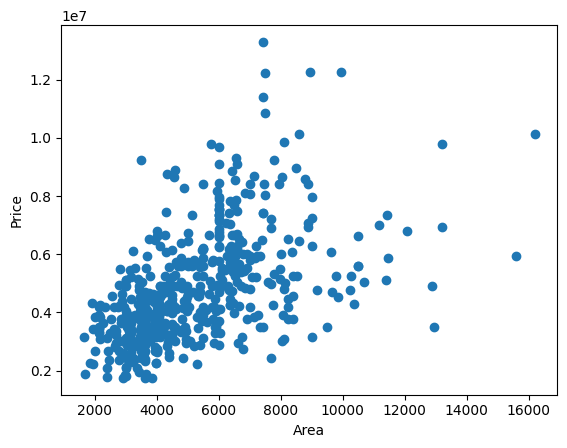

In [9]:
import matplotlib.pyplot as plt
plt.scatter(df["area"],df["price"])
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

In [10]:
x=df[["area"]]
y=df["price"]


In [11]:
#5 Train-Test split
#A model must perform well on unseen data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [12]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_std=sc.fit_transform(x_train)
x_test_std=sc.transform(x_test)


In [13]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train_std,y_train)
print("Co-efficient ",  lr.coef_)
print("Intercept ",lr.intercept_)

Co-efficient  [937365.2950322]
Intercept  4706527.385321101


In [14]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred=lr.predict(x_test_std))
print("R2 Score ",r2)

R2 Score  0.27287851871974633


In [15]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np
mse=mean_squared_error(y_test,y_pred=lr.predict(x_test_std))
print("MSE ",mse)
rmse=np.sqrt(mse)
print("RMSE ",rmse)

MSE  3675286604768.1855
RMSE  1917103.7021424235


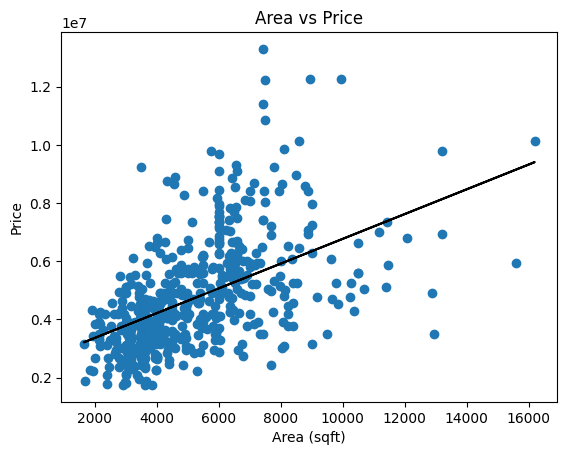

In [20]:
plt.scatter(x,y)
plt.plot(x_train,lr.predict(x_train_std),color="black")
plt.xlabel("Area (sqft)")
plt.ylabel("Price")
plt.title("Area vs Price")
plt.show()

In [22]:
import pandas as pd
area_sq = float(input("Enter area in square feets: "))
area_df = pd.DataFrame([[area_sq]], columns=["area"])
area_scaled = sc.transform(area_df)
price_pred = lr.predict(area_scaled)
print(f"Price in lakhs: {price_pred[0] / 100000:.2f}")



Price in lakhs: 37.89
